# Wildfire and Air Quality Analysis in New Haven
This notebook analyzes wildfire data and air quality indices for the city of New Haven, focusing on trends over time and the relationship between fire incidents and air quality.

## Importing Required Libraries
The following libraries are imported for data manipulation, analysis, and visualization:
- **pandas**: For handling and processing datasets.
- **matplotlib.pyplot**: For visualizing data through plots and graphs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Datasets
We load two datasets:
1. **Fire Data**: Contains information about wildfires, including their size and distance from New Haven.
2. **Air Quality Index Data**: Contains air quality measurements over time.

Ensure that the files `fire_Data.csv` and `air_index.csv` are placed in the `Data/` folder relative to this notebook.

In [ ]:
air_index = pd.read_csv('Data/air_index.csv')  # Load air quality index data
fire_data = pd.read_csv('Data/fire_Data.csv')  # Load wildfire data

## Initial Data Exploration
To understand the structure and content of the datasets, we examine the first few rows and their dimensions.

In [17]:
print(air_index.head())
print(air_index.shape)

   Unnamed: 0  year  smoke_impact_score  acres_burned  days_with_data  \
0           0  1999            0.012637   1578.443405              61   
1           1  2000            0.212925  24183.219032             179   
2           2  2001            0.002849    482.731373             177   
3           3  2002            0.015729   2934.206403             161   
4           4  2003            0.000034      5.015029             174   

   mean_pm25  max_pm25  
0  14.730238      40.5  
1  14.855283      46.2  
2  15.623760      48.4  
3  14.933728      79.4  
4  15.347384      52.2  
(22, 7)


In [18]:
print(fire_data.head())
print(fire_data.shape)

   Unnamed: 0  year   fire_name  size_acres  distance_miles discovery_date
0           0  1963     COLORED   30.743401      299.749547     07/04/1963
1           1  1965  ABRAMS MTN    3.978242      358.065766     10/30/1965
2           2  1965  SANDY BOTT    1.989492      362.727378     07/31/1965
3           3  1965     SKYLAND    1.989099      344.217657     07/24/1965
4           4  1965  LEWIS PEAK    0.248821      372.711555     08/17/1965
(1652, 6)


## Extracting Year and Calculating Metrics
In this section:
1. Extract the `year` column from the `date` field in `fire_data`.
2. Group the data by year and compute:
   - **Median Distance**: Median distance of fires from New Haven.
   - **Total Fires**: Total number of fires per year.
3. Visualize these metrics through a line plot and a bar chart.

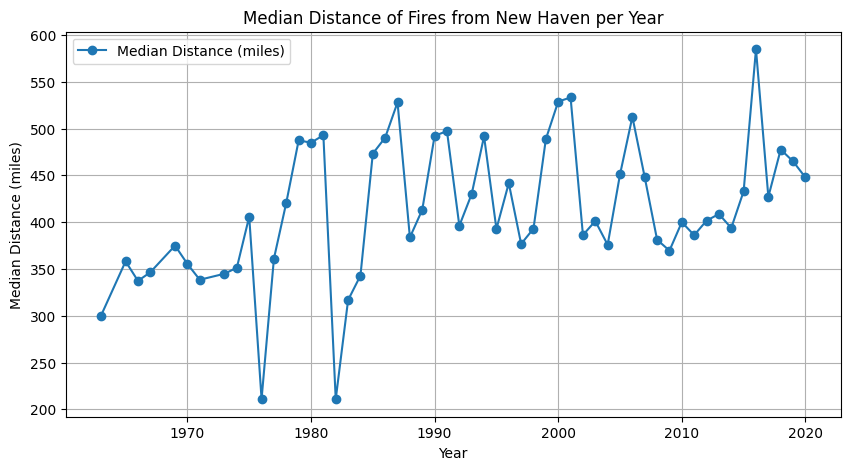

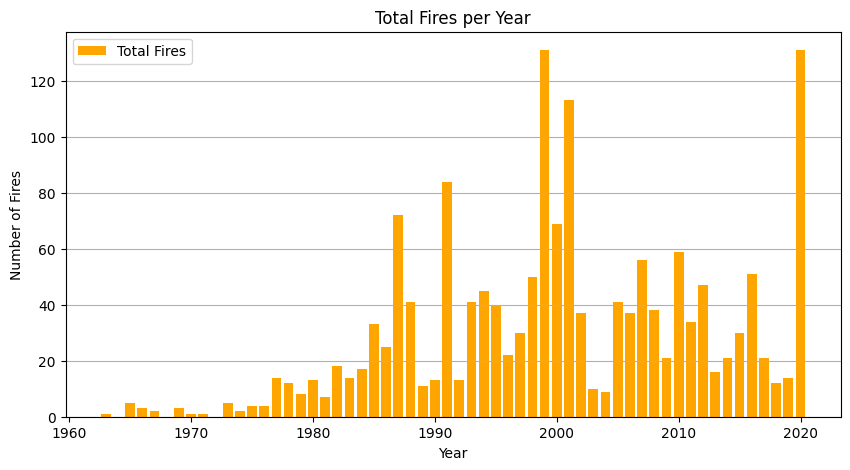

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'year' column exists; extract from 'date' if necessary
if 'year' not in fire_data.columns:
    fire_data['year'] = pd.to_datetime(fire_data['date']).dt.year  # Adjust 'date' to match the column name in your data

# Group the data by year and compute metrics
fire_stats = fire_data.groupby('year', as_index=False).agg({
    'distance_miles': 'median',  # Calculate median distance
    'size_acres': 'count'  # Count total number of fires
}).rename(columns={'distance_miles': 'median_distance_miles', 'size_acres': 'total_fires'})

# Line plot: Median Distance of Fires per Year
plt.figure(figsize=(10, 5))
plt.plot(fire_stats['year'], fire_stats['median_distance_miles'], marker='o', label='Median Distance (miles)')
plt.title('Median Distance of Fires from New Haven per Year')
plt.xlabel('Year')
plt.ylabel('Median Distance (miles)')
plt.grid()
plt.legend()
plt.show()

# Bar chart: Total Fires per Year
plt.figure(figsize=(10, 5))
plt.bar(fire_stats['year'], fire_stats['total_fires'], color='orange', label='Total Fires')
plt.title('Total Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.grid(axis='y')
plt.legend()
plt.show()

## Insights from Visualizations
- **Line Plot**: The line plot shows the median distance of wildfires from New Haven over the years. This metric helps us understand how close wildfires have been to the city on average.
- **Bar Chart**: The bar chart represents the total number of fires per year, indicating trends in wildfire frequency.

## Analyzing Air Quality Trends Over Time
In this section:
1. Ensure that the `year` column is extracted from the `date` column in the `air_index` dataset.
2. Visualize the mean PM2.5 levels for each year using a line plot. PM2.5 refers to particulate matter with a diameter of less than 2.5 micrometers, which is an important air quality indicator.

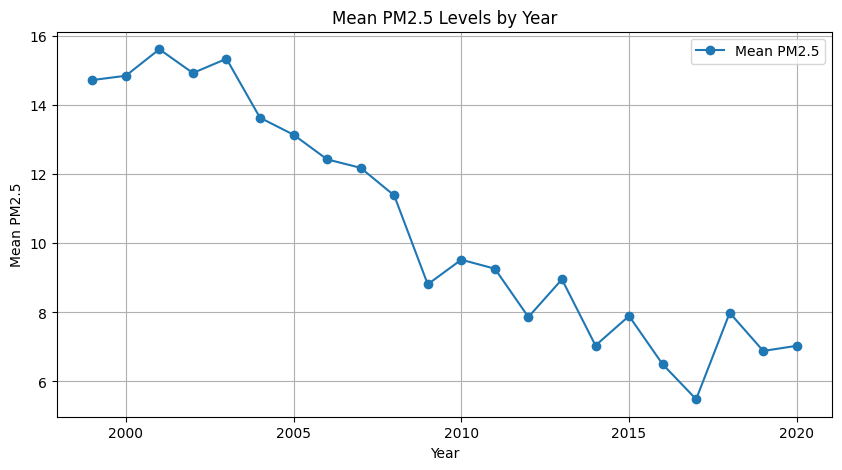

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'year' column from 'date' if it does not exist
if 'year' not in air_index.columns:
    air_index['year'] = pd.to_datetime(air_index['date']).dt.year  # Convert 'date' to datetime and extract year

# Plot the mean PM2.5 levels by year
plt.figure(figsize=(10, 5))
plt.plot(air_index['year'], air_index['mean_pm25'], marker='o', label='Mean PM2.5')
plt.title('Mean PM2.5 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Mean PM2.5')
plt.grid()
plt.legend()
plt.show()

## Insights from Mean PM2.5 Visualization
- The line plot highlights the annual mean PM2.5 levels, helping to identify trends over time.
- The chart shows a steady decline over time.

## Merging Fire Data with Air Quality Data
In this section:
1. Group the fire data by year and calculate:
   - **Average Fire Size**: Mean fire size in acres.
   - **Average Distance**: Mean distance of fires from New Haven in miles.
2. Merge the grouped fire data with the air quality index data on the `year` column.
3. Save the merged dataset for further analysis.

In [ ]:
import pandas as pd

# Group fire data by year and calculate average size and distance
fire_data_grouped = fire_data.groupby('year', as_index=False).agg({
    'size_Acres': 'mean',  # Calculate mean fire size in acres
    'distance_miles': 'mean'  # Calculate mean distance of fires in miles
}).rename(columns={'size_Acres': 'avg_size_Acres', 'distance_miles': 'avg_distance_miles'})

# Merge the grouped fire data with air quality data on the 'year' column
merged_data = pd.merge(fire_data_grouped, air_index, on='year', how='inner')

# Save the merged dataset to a CSV file for further analysis
merged_data.to_csv('merged_fire_air_data', index=False)

## Insights and Next Steps
- The merged dataset combines fire data and air quality data to explore potential relationships between wildfire incidents and air quality.
- The saved dataset (`merged_fire_air_data.csv`) can be used for advanced correlation analysis and visualization in subsequent sections.

In [26]:
fire_air_merged = pd.read_csv('merged_fire_air_data.csv')
fire_air_merged

,year,avg_distance_miles,avg_size_acres,Unnamed: 0,days_with_data,mean_pm25,max_pm25
0,1999,451.264024,1476.512273,0,61,14.730238,40.500000
1,2000,494.002635,1122.923484,1,179,14.855283,46.200000
2,2001,480.157889,1456.381405,2,177,15.623760,48.400000
3,2002,378.616273,505.940633,3,161,14.933728,79.400000
4,2003,334.708011,516.736284,4,174,15.347384,52.200000
5,2004,326.562137,462.576857,5,178,13.639401,43.200000
6,2005,406.882037,505.747575,6,175,13.146965,49.300000
7,2006,439.559822,738.810776,7,181,12.433158,43.328571
8,2007,455.076732,961.778302,8,184,12.187499,44.900000
9,2008,366.843689,1984.318300,9,177,11.388288,37.900000


## Calculating the Wildfire Impact Score
The wildfire impact score is calculated using the following formula:


### Impact Score = A * {Mean PM2.5} + B * (Average Fire Size (Acres)/ {Average Distance (Miles)}^2) + C

Where:
- **A**, **B**, and **C** are constants that define the relative importance of each component.
- **Mean PM2.5**: Annual mean particulate matter concentration.
- **Average Fire Size**: Mean size of wildfires in acres.
- **Average Distance**: Mean distance of wildfires from New Haven in miles.

### Steps:
1. Load the merged dataset containing air quality and wildfire data.
2. Define the constants (**A**, **B**, and **C**).
3. Compute the impact score using the formula above.
4. Visualize the calculated impact score over time.

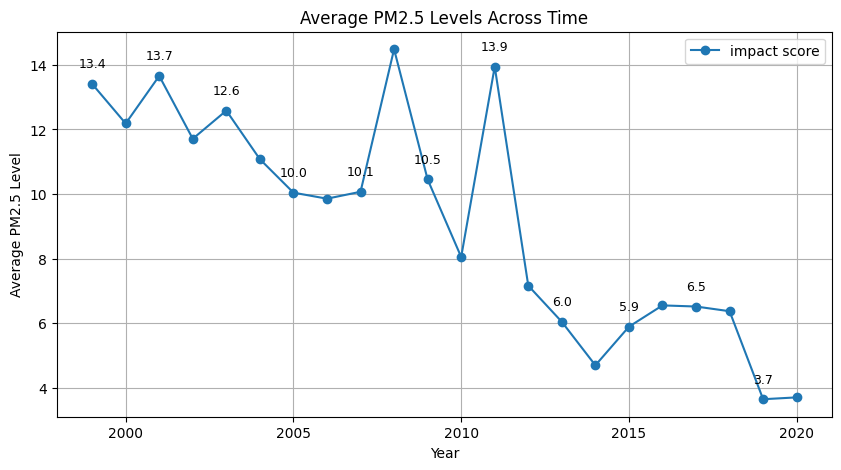

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
fire_air_merged = pd.read_csv('merged_fire_air_data.csv')

# Define constants for the impact score calculation
A = 0.8  # Weight for PM2.5 levels
B = 500.0  # Weight for fire size and distance ratio
C = -2  # Baseline adjustment factor

# Calculate the wildfire impact score
fire_air_merged['impact_score'] = (
    A * fire_air_merged['mean_pm25'] +  # PM2.5 contribution
    B * (fire_air_merged['avg_size_acres'] / (fire_air_merged['avg_distance_miles'] ** 2)) +  # Fire size/distance contribution
    C  # Baseline adjustment
)

# Plot the wildfire impact score over time
plt.figure(figsize=(10, 5))
plt.plot(fire_air_merged['year'], fire_air_merged['impact_score'], marker='o', label='Impact Score')

# Annotate alternate years for readability
for i, (x, y) in enumerate(zip(fire_air_merged['year'], fire_air_merged['impact_score'])):
    if i % 2 == 0:  # Add labels every other year
        plt.text(x, y + 0.5, f"{y:.1f}", fontsize=9, ha='center')

# Customize plot labels and title
plt.title('Wildfire Impact Score Over Time')
plt.xlabel('Year')
plt.ylabel('Impact Score')
plt.grid()
plt.legend()
plt.show()

## Insights from the Wildfire Impact Score
- The wildfire impact score provides a comprehensive metric for evaluating the combined effects of wildfire size, proximity, and air quality on New Haven.
- Significant peaks in the impact score may correspond to years with major wildfire incidents or high PM2.5 levels.


## Listing Available Data Files
Before proceeding, we list the files in the `Data` directory to ensure all required datasets are available. This step helps verify the presence of necessary files for analysis.

In [2]:
!ls Data

TownEmp2000_NAICS2.xls                  TownEmp2013_NAICS2.xls
TownEmp2001_NAICS2(1).xls               TownEmp2014_NAICS2.xls
TownEmp2002_NAICS2.xls                  TownEmp2015_NAICS2.xlsx
TownEmp2003_NAICS2.xls                  TownEmp2016_NAICS2.xlsx
TownEmp2004_NAICS2.xls                  TownEmp2017_NAICS2.xlsx
TownEmp2005_NAICS2.xls                  TownEmp2018_NAICS2.xlsx
TownEmp2006_NAICS2.xls                  TownEmp2019_NAICS2.xlsx
TownEmp2007_NAICS2.xls                  TownEmp2022_NAICS2.xlsx
TownEmp2008_NAICS2.xls                  TownEmp2023_NAICS2.xlsx
TownEmp2009_NAICS2.xls                  Town_Emp_2020_annual_and_quarterly.xlsx
TownEmp2010_NAICS2.xls                  Town_Emp_2021_annual_and_quarterly.xlsx
TownEmp2011_NAICS2.xls                  air_index.csv
TownEmp2012_NAICS2.xls                  fire_Data.csv


## Economic Data Overview
The `TownEmp` file contains economic data for each city in Connecticut, including:
- Industry-specific information.
- The number of facilities, sites, or plants (referred to as "units").
- Spending on employment in each sector.
- Average wages.

The goal is to:
1. Filter this data for the city of New Haven.
2. Merge the economic data with the wildfire impact dataset to analyze the broader implications of wildfires on the city's economy.

In [ ]:
import os
import pandas as pd

# Get the current directory
directory = os.getcwd()

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Define the specific sheet names for certain years
specific_sheets = {
    "2014": "TownEmp2014",
    "2018": "TownEmp_NAICS2_towns",
    "2019": "qryTownEmp_NAICS2_towns",
    "2022": "Annual 2022",
    "2023": "qryTownEmp_NAICS2_towns"
}

# Iterate through each file in the directory
for file_name in os.listdir(directory):
    if file_name.startswith("TownEmp20") and (file_name.endswith(".xls") or file_name.endswith(".xlsx")):
        # Extract the year from the filename (assuming format TownEmp20XX_whatever.xls(x))
        year = file_name[7:11]  # Extract '20XX' part

        # Load the Excel file
        file_path = os.path.join(directory, file_name)
        excel_data = pd.ExcelFile(file_path)

        # Determine the sheet name
        if year in specific_sheets:
            sheet_name = specific_sheets[year]
        elif year == "2020":
            sheet_name = "Annual 2020"
        elif year == "2021":
            sheet_name = "Annual 2021"
        else:
            # Default logic: Try using the file name with or without the `qry` prefix
            base_name = os.path.splitext(file_name)[0]
            sheet_name = base_name if base_name in excel_data.sheet_names else f"qry{base_name}"

        # Ensure the sheet name exists
        if sheet_name not in excel_data.sheet_names:
            print(f"Sheet '{sheet_name}' not found in file '{file_name}', skipping.")
            continue

        # Parse the relevant sheet
        df = excel_data.parse(sheet_name)

        # Use the first column dynamically for town names
        town_name_column = df.columns[0]

        # Locate the New Haven data and continue until the next empty row
        try:
            start_index = df[df[town_name_column] == 'New Haven'].index[0]
        except IndexError:
            print(f"'New Haven' not found in file '{file_name}', skipping.")
            continue
        
        town_data = df.iloc[start_index:]
        town_data = town_data[town_data[town_name_column].notna().cumsum().eq(1)]
        town_data[town_name_column] = 'New Haven'  # Fill down the town name

        # Add the year as a new column
        town_data['Year'] = year

        # Append to the combined DataFrame
        combined_data = pd.concat([combined_data, town_data], ignore_index=True)

# Save the combined data to a CSV file in the same directory
output_path = os.path.join(directory, "NewHaven_Sector_Data_2000_2023.csv")
combined_data.to_csv(output_path, index=False)

print(f"Data for all years has been combined and saved to {output_path}.")

In [177]:
newhaven_economic_data = pd.read_csv('NewHavenEconomics2000-2023.csv')

In [178]:
newhaven_economic_data

,NAICS Code,Industry,Units,Annual Average Employment,Total Annual Wages,Annual Average Wages,Year
0,0,Total - All Industries,"2,983","78,078","$3,280,085,155","$42,010.14",2000
1,11,"Agriculture, Forestry, Fishing and Hunting",*,*,*,*,2000
2,22,Utilities,*,*,*,*,2000
3,23,Construction,129,"1,163","$58,688,548","$50,477.54",2000
4,31,Manufacturing,113,"3,987","$164,427,816","$41,239.26",2000
...,...,...,...,...,...,...,...
573,99,Unclassified establishment,*,*,*,*,2023
574,G0,Total Government,77,"11,202","$875,174,268","$78,130",2023
575,G1,Federal Government,27,"1,235","$134,278,238","$108,757",2023
576,G2,State Government,28,"4,231","$326,211,887","$77,094",2023


In [179]:
# All the industries that we could analyse over the 2 decades from 2000-2023
newhaven_economic_data['Industry'].unique()

array(['Total - All Industries',
       'Agriculture, Forestry, Fishing and Hunting', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)',
       'Unclassifiable/unknown industry', 'Total Government',
       'Federal Government', 'State Government',
       'Local/Municipal Government', 'Mining',
       'Agric., Forestry, Fishing and Hunting',
       'Transportation & Warehousing', 'Real Estate & Rental & Leasing',
       'Professio

/var/folders/qv/3qrv3nmd56s90r_lb6dwy2w00000gn/T/ipykernel_80502/112910681.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['Year'] = pd.to_numeric(data_0['Year'], errors='coerce')
/var/folders/qv/3qrv3nmd56s90r_lb6dwy2w00000gn/T/ipykernel_80502/112910681.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_g0123['Year'] = pd.to_numeric(data_g0123['Year'], errors='coerce')


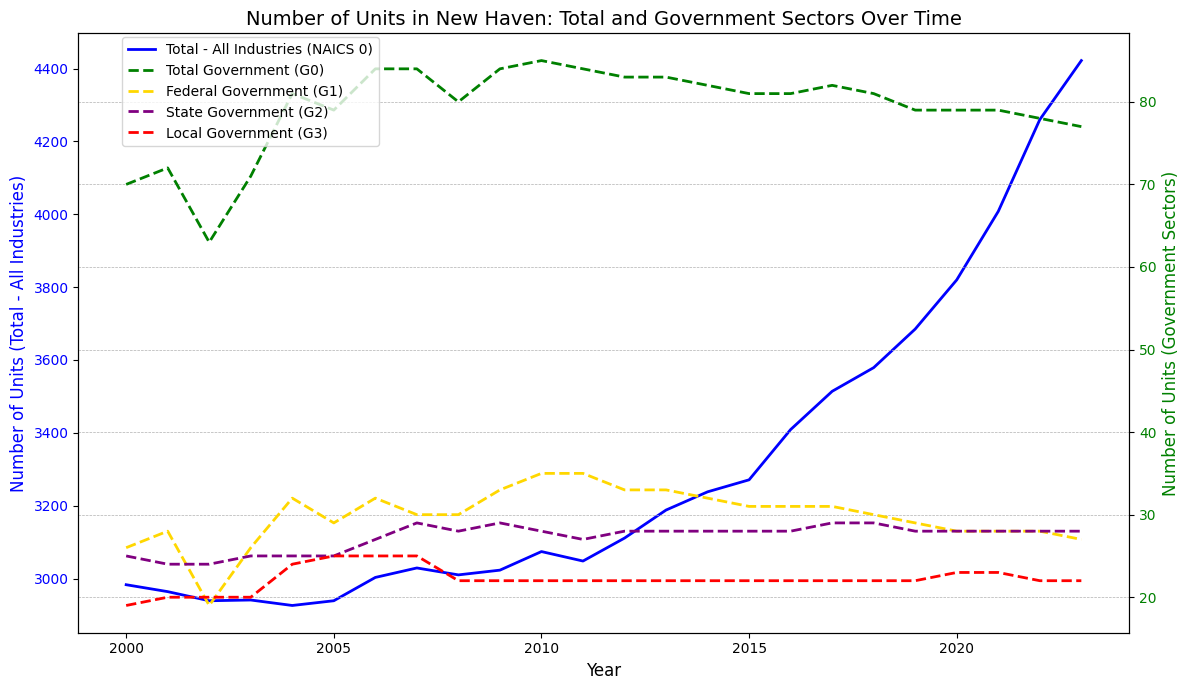

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the Units column is cleaned and converted to integers
newhaven_economic_data['Units'] = newhaven_economic_data['Units'].replace(',', '', regex=True)
newhaven_economic_data['Units'] = pd.to_numeric(newhaven_economic_data['Units'], errors='coerce')


# Filter data for NAICS Code 0 and G0, G1, G2, G3
data_0 = newhaven_economic_data[newhaven_economic_data['NAICS Code'] == '0']
naics_codes = ['G0', 'G1', 'G2', 'G3']
data_g0123 = newhaven_economic_data[newhaven_economic_data['NAICS Code'].isin(naics_codes)]

# Ensure Year is numeric
if 'Year' in newhaven_economic_data.columns:
    data_0['Year'] = pd.to_numeric(data_0['Year'], errors='coerce')
    data_g0123['Year'] = pd.to_numeric(data_g0123['Year'], errors='coerce')
else:
    print("Column 'Year' not found!")

# Plotting
if not data_0.empty and not data_g0123.empty:
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Plot NAICS Code 0 on the left y-axis
    ax1.plot(data_0['Year'], data_0['Units'], label='Total - All Industries (NAICS 0)', color='blue', linewidth=2)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Number of Units (Total - All Industries)', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot G0, G1, G2, G3 on the right y-axis
    ax2 = ax1.twinx()
    colors = {'G0': 'green', 'G1': 'gold', 'G2': 'purple', 'G3': 'red'}
    labels = {
        'G0': 'Total Government (G0)',
        'G1': 'Federal Government (G1)',
        'G2': 'State Government (G2)',
        'G3': 'Local Government (G3)'
    }
    for code, color in colors.items():
        subset = data_g0123[data_g0123['NAICS Code'] == code]
        ax2.plot(subset['Year'], subset['Units'], label=labels[code], color=color, linewidth=2, linestyle='--')
    
    ax2.set_ylabel('Number of Units (Government Sectors)', fontsize=12, color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.1, 0.95), fontsize=10)
    
    # Add title and grid
    plt.title('Number of Units in New Haven: Total and Government Sectors Over Time', fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
else:
    print("Cannot plot, check the data for NAICS Code 0 or G0, G1, G2, G3.")

## Merging Economic Data with Wildfire Impact Data
This section merges the economic data for New Haven with the wildfire impact dataset to analyze:
- The economic impact of wildfires on various industries.
- Potential correlations between wildfire impact scores and spending or wages in different sectors.

In [191]:
# Ensure the 'Total Annual Wages' column is cleaned and converted to integers
newhaven_economic_data['Total Annual Wages'] = newhaven_economic_data['Total Annual Wages'].replace({'\$': '', ',': ''}, regex=True)
newhaven_economic_data['Total Annual Wages'] = pd.to_numeric(newhaven_economic_data['Total Annual Wages'], errors='coerce')

# Verify the column conversion
print(econ_fire_data['Total Annual Wages'].head())
# Ensure both datasets have the 'year' column in the same format
newhaven_economic_data['year'] = pd.to_numeric(newhaven_economic_data['Year'], errors='coerce')

fire_air_merged['year'] = pd.to_numeric(fire_air_merged['year'], errors='coerce')

# Merge the datasets on the 'year' column
merged_data = pd.merge(newhaven_economic_data, fire_air_merged, on='year', how='inner')

# Display the first few rows of the merged dataset
merged_data.to_csv('FIREAIR_ECONOMICS_merged.csv')

0    $3,280,085,155
1                 *
2                 *
3       $58,688,548
4      $164,427,816
Name: Total Annual Wages, dtype: object


In [192]:
econ_fire_data = pd.read_csv('FIREAIR_ECONOMICS_merged.csv')

## Insights and Next Steps
- The merged dataset combines wildfire impact scores with economic data, providing a comprehensive view of how wildfires influence the local economy.

In [207]:
econ_fire_data

,Unnamed: 0.1,Unnamed: 0,NAICS Code,Industry,Units,Annual Average Employment,Total Annual Wages,Annual Average Wages,Year,avg_distance_miles,avg_size_acres,days_with_data,mean_pm25,max_pm25,impact_score
0,0,0,0,Total - All Industries,2983.0,"78,078","$3,280,085,155",42010.14,2000,494.002635,1122.923484,179,14.855283,46.200000,1.201229
1,1,1,11,"Agriculture, Forestry, Fishing and Hunting",0.0,*,*,0.00,2000,494.002635,1122.923484,179,14.855283,46.200000,1.201229
2,2,2,22,Utilities,0.0,*,*,0.00,2000,494.002635,1122.923484,179,14.855283,46.200000,1.201229
3,3,3,23,Construction,129.0,"1,163","$58,688,548",50477.54,2000,494.002635,1122.923484,179,14.855283,46.200000,1.201229
4,4,4,31,Manufacturing,113.0,"3,987","$164,427,816",41239.26,2000,494.002635,1122.923484,179,14.855283,46.200000,1.201229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,498,99,Unclassified establishment,11.0,4,"$374,981",88230.82,2020,404.083799,27.249853,184,7.033013,23.719423,0.447656
499,499,499,G0,Total Government,79.0,"10,810","$759,866,753",70292.95,2020,404.083799,27.249853,184,7.033013,23.719423,0.447656
500,500,500,G1,Federal Government,28.0,984,"$102,695,190",104338.52,2020,404.083799,27.249853,184,7.033013,23.719423,0.447656
501,501,501,G2,State Government,28.0,"4,296","$297,380,364",69218.59,2020,404.083799,27.249853,184,7.033013,23.719423,0.447656


## Linear Regression Analysis for Economic Data by Industry
This section performs linear regression analysis to understand the relationship between:
1. **Year**: To capture trends over time.
2. **Wildfire Impact Score**: To assess the effect of wildfires on economic metrics.

### Methodology:
- Group the economic data by **NAICS Code** (a classification for industries).
- Perform a separate regression for each NAICS Code to:
  - Analyze the effect of `Year` and `Impact Score` on the number of facilities (Units).
  - Evaluate statistical significance using p-values.
- Store and display the results for the top 10 industries based on the p-value for the wildfire impact score.

## Economic Impact Analysis: Wildfires and Industry Trends
This section investigates the relationship between wildfires and economic indicators, including:
1. **Units**: The number of facilities, sites, or plants for each industry.
2. **Total Annual Wages**: The annual wages paid by each industry.

### Methodology:
- Perform linear regression analysis for each **NAICS Code** (industry classification).
- Predict:
  1. **Units**: Using `Year` and `Impact Score` as predictors.
  2. **Total Annual Wages**: Using the same predictors.
- Rank industries by statistical significance (p-values) to identify which are most affected by wildfire impact.
- Display and save the top 10 results for each analysis.

In [ ]:
from tabulate import tabulate  # For displaying results in table format
import pandas as pd
import statsmodels.api as sm

# Ensure numeric types for relevant columns
econ_fire_data['Units'] = pd.to_numeric(econ_fire_data['Units'], errors='coerce')
econ_fire_data['impact_score'] = pd.to_numeric(econ_fire_data['impact_score'], errors='coerce')
econ_fire_data['Year'] = pd.to_numeric(econ_fire_data['Year'], errors='coerce')

# Drop rows with missing values in required columns
econ_fire_data = econ_fire_data.dropna(subset=['Units', 'impact_score', 'NAICS Code', 'Industry', 'Year'])

# Group data by NAICS Code
grouped = econ_fire_data.groupby(['NAICS Code'])

# Initialize a list to store regression results
results = []

# Perform regression analysis for each NAICS Code
for naics, group in grouped:
    if len(group) > 1:  # Perform regression only if there are enough data points
        # Prepare independent variables (Year and Impact Score)
        X = group[['Year', 'impact_score']]
        X = sm.add_constant(X)  # Add a constant for the regression intercept
        y = group['Units']  # Dependent variable (Units)

        try:
            # Fit the regression model
            model = sm.OLS(y, X).fit()

            # Store relevant results
            results.append({
                'NAICS Code': naics,
                'Industry': group['Industry'].iloc[0],  # Industry name
                'p_value_year': model.pvalues['Year'],  # p-value for Year
                'p_value_impact_score': model.pvalues['impact_score'],  # p-value for impact score
                'coefficient_year': model.params['Year'],  # Coefficient for Year
                'coefficient_impact_score': model.params['impact_score'],  # Coefficient for impact score
            })
        except Exception as e:
            print(f"Error for NAICS {naics}: {e}")

# Process and display regression results
if results:
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort results by p-value for impact score
    results_df = results_df.sort_values(by='p_value_impact_score')

    # Display the top 10 results as a neat table
    print("Top 10 Results:")
    print(tabulate(results_df.head(10), headers='keys', tablefmt='grid'))

    # Save results to a CSV file if needed
    # results_df.to_csv("linear_analysis_results_with_year.csv", index=False)
else:
    print("No valid regression results.")

+----+--------------+----------------+------------------------+--------------------+----------------------------+--------------------------------------------------------------------------+
|    | NAICS Code   |   p_value_year |   p_value_impact_score |   coefficient_year |   coefficient_impact_score | Industry                                                                 |
+====+==============+================+========================+====================+============================+==========================================================================+
|  4 | ('31',)      |    1.32157e-08 |              0.0337099 |          -1.70613  |                   -8.51358 | Manufacturing                                                            |
+----+--------------+----------------+------------------------+--------------------+----------------------------+--------------------------------------------------------------------------+
| 10 | ('53',)      |    0.0462546   |              0.0

In [224]:
from tabulate import tabulate  # Import tabulate for neat table display
import pandas as pd
import statsmodels.api as sm

# Load the dataset
econ_fire_data = pd.read_csv('FIREAIR_ECONOMICS_merged.csv')

# Ensure 'impact_score', 'Year', and 'Units' are numeric
econ_fire_data['impact_score'] = pd.to_numeric(econ_fire_data['impact_score'], errors='coerce')
econ_fire_data['Year'] = pd.to_numeric(econ_fire_data['Year'], errors='coerce')
econ_fire_data['Units'] = pd.to_numeric(econ_fire_data['Units'], errors='coerce')

# Process 'Total Annual Wages': remove '$' and commas, then convert to numeric
econ_fire_data['Total Annual Wages'] = econ_fire_data['Total Annual Wages'].replace({'\$': '', ',': ''}, regex=True)
econ_fire_data['Total Annual Wages'] = pd.to_numeric(econ_fire_data['Total Annual Wages'], errors='coerce')

# Drop rows with missing data
econ_fire_data = econ_fire_data.dropna(subset=['Total Annual Wages', 'impact_score', 'NAICS Code', 'Industry', 'Year', 'Units'])

# Group by NAICS Code
grouped = econ_fire_data.groupby(['NAICS Code'])

# Perform linear regression for each NAICS Code to predict Total Annual Wages
results = []

for naics, group in grouped:
    if len(group) > 1:  # Perform regression only if there are enough data points
        # Prepare the independent variables (Year and impact_score)
        X = group[['Year', 'impact_score']]
        X = sm.add_constant(X)  # Add constant for the intercept
        y = group['Total Annual Wages']  # Dependent variable
        
        try:
            model = sm.OLS(y, X).fit()
            # Store results
            results.append({
                'NAICS Code': naics,
                'p_value_year': model.pvalues['Year'],  # p-value for Year
                'p_value_impact_score': model.pvalues['impact_score'],  # p-value for impact_score
                'coefficient_year': model.params['Year'],  # Coefficient for Year
                'coefficient_impact_score': model.params['impact_score'],  # Coefficient for impact_score
                'Industry': group['Industry'].iloc[0]  # Map to the first industry name
            })
        except Exception as e:
            print(f"Error for NAICS {naics}: {e}")

# Create a DataFrame to store results
if results:
    results_df = pd.DataFrame(results)
    # Sort results by p-value for impact_score
    results_df = results_df.sort_values(by='p_value_impact_score')

    # Display results in a neat table format
    print(tabulate(results_df.head(10), headers='keys', tablefmt='grid'))  # Display top 10 results
else:
    print("No valid regression results.")

# Save results to a file if needed
# results_df.to_csv("linear_analysis_results_predicting_wages.csv", index=False)

+----+--------------+----------------+------------------------+--------------------+----------------------------+--------------------------------------------------------------------------+
|    | NAICS Code   |   p_value_year |   p_value_impact_score |   coefficient_year |   coefficient_impact_score | Industry                                                                 |
+====+==============+================+========================+====================+============================+==========================================================================+
|  3 | ('42',)      |    0.00022112  |             0.00984669 |        3.2192e+06  |                3.67227e+06 | Wholesale Trade                                                          |
+----+--------------+----------------+------------------------+--------------------+----------------------------+--------------------------------------------------------------------------+
| 18 | ('G0',)      |    6.12417e-09 |             0.04

## Insights from Linear Regression Analysis
- The analysis highlights the relationship between wildfire impact scores, year, and the number of facilities (Units) for various industries.
- Key industries where wildfire impact scores are statistically significant can be identified for further investigation.
- Observations:
  - **p-value for impact score**: Indicates the statistical significance of wildfires on the industry's facilities.
  - **Coefficient for impact score**: Measures the magnitude of the wildfire impact.
